In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import torch
from torch_geometric.data import Data
import awkward as ak
 
 
import torchUtils as gnn

In [2]:
d = "../gnn_model"

In [3]:
dataset = gnn.Dataset("../data_csv")

In [4]:
dataset.load_extra("golden")

In [5]:
model = gnn.GeoModel("../gnn_model")

Node Error: 0.0
Edge Error: 0.0


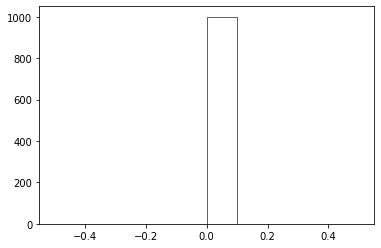

In [6]:
node_errors = []
edge_errors = []

for graph in dataset:
    with torch.no_grad():
        node_o,edge_o = model(graph.x,graph.edge_index,graph.edge_attr)
        
    node_o,edge_o = node_o.numpy(),edge_o.numpy()
    node_t,edge_t = graph.golden_x,graph.golden_edge_attr
    
    node_errors.append( np.sum((node_t - node_o)**2) )
    edge_errors.append( np.sum((edge_t - edge_o)**2) )
node_errors = np.array(node_errors)
edge_errors = np.array(edge_errors)
    
print(f"Node Error: {node_errors.sum()}")
print(f"Edge Error: {edge_errors.sum()}")

import matplotlib.pyplot as plt 

plt.hist([node_errors,edge_errors],histtype='step')
plt.show()